In [21]:
import sys
!{sys.executable} -m pip install pygam

# 1.1
## a
$\lambda=\infty,m=0$

Set the equation to 0 to minimize $\hat{g}(x)$:
\begin{equation}
   \int (g(x))^2dx = 0
\end{equation}
Here, $g(x) = 0$ for the statement to be true, so $\hat{g}=0$.

## b
$\lambda=\infty,m=1$

Set the equation to 0 again.
\begin{equation}
    \int (g^{(1)}(x))^2dx = 0
\end{equation}
For this, we need $g^{(1)}(x) = 0$, so set $g(x) = c$
\begin{equation}
    \sum^n_{i=1}(y_i-c)^2
\end{equation}
To minimize this, we would want to have $c=\bar{y = \hat{g}}$.


## c
$\lambda=\infty,m=2$
Set the equation to 0 again:
\begin{equation}
    \int (g^{(2)}(x))^2dx = 0
\end{equation}
Need $g^{(2)}(x) = 0$, so $g(x) = ax+b, a,b\in R$. To minimize:
\begin{equation}
    \sum^n_{i=1}(y_i-(ax+b))^2
\end{equation}
we set
$\hat{g}(x)=ax+b$

$a=\frac{\sum^n_{i=1}y_i(x_i-\bar{x})}{\sum^n_{i=1}(x_i-\bar{x})^2}$, where $\bar{x}=\frac{1}{n}\sum^n_{i=1}x_i$

$b=\bar{y}-a\bar{x}$

## d
Using the same principle as above, we need 
\begin{equation}
    \int (g^{(2)}(x))^2dx = 0
\end{equation}
Therefore:
\begin{equation}
    \sum^n_{i=1}(y_i-(ax^2+bx+c))^2
\end{equation}
and
$\hat{g}(x)=ax^2+bx+c$

## e
$\lambda=0,m=3$
To minimize  $\hat{g}(x)$:
\begin{equation}
    \sum^n_{i=1}(y_i-g(x_i))^2
\end{equation}
As shown above, to minimize this we set $g(x)= c=\bar{y}$ therefore $\hat{g}(x)=\bar{y}$.

# 1.2
## a
As $\lambda\rightarrow\infty$, $\hat{g}_2$ will have the smaller training RSS because $\int(g^{(4)}(x))^2dx$ produces a higher order polynomial.

## b
Like (a), $\hat{g}_1$ will have the smaller testing RSS. The higher order polynomial overfits the data.

## c
When $\lambda=0$ the second half of the equation $\rightarrow0$ for $\hat{g}_1, \hat{g}_2$ so they will have the same training RSS and test RSS.






# 2.1
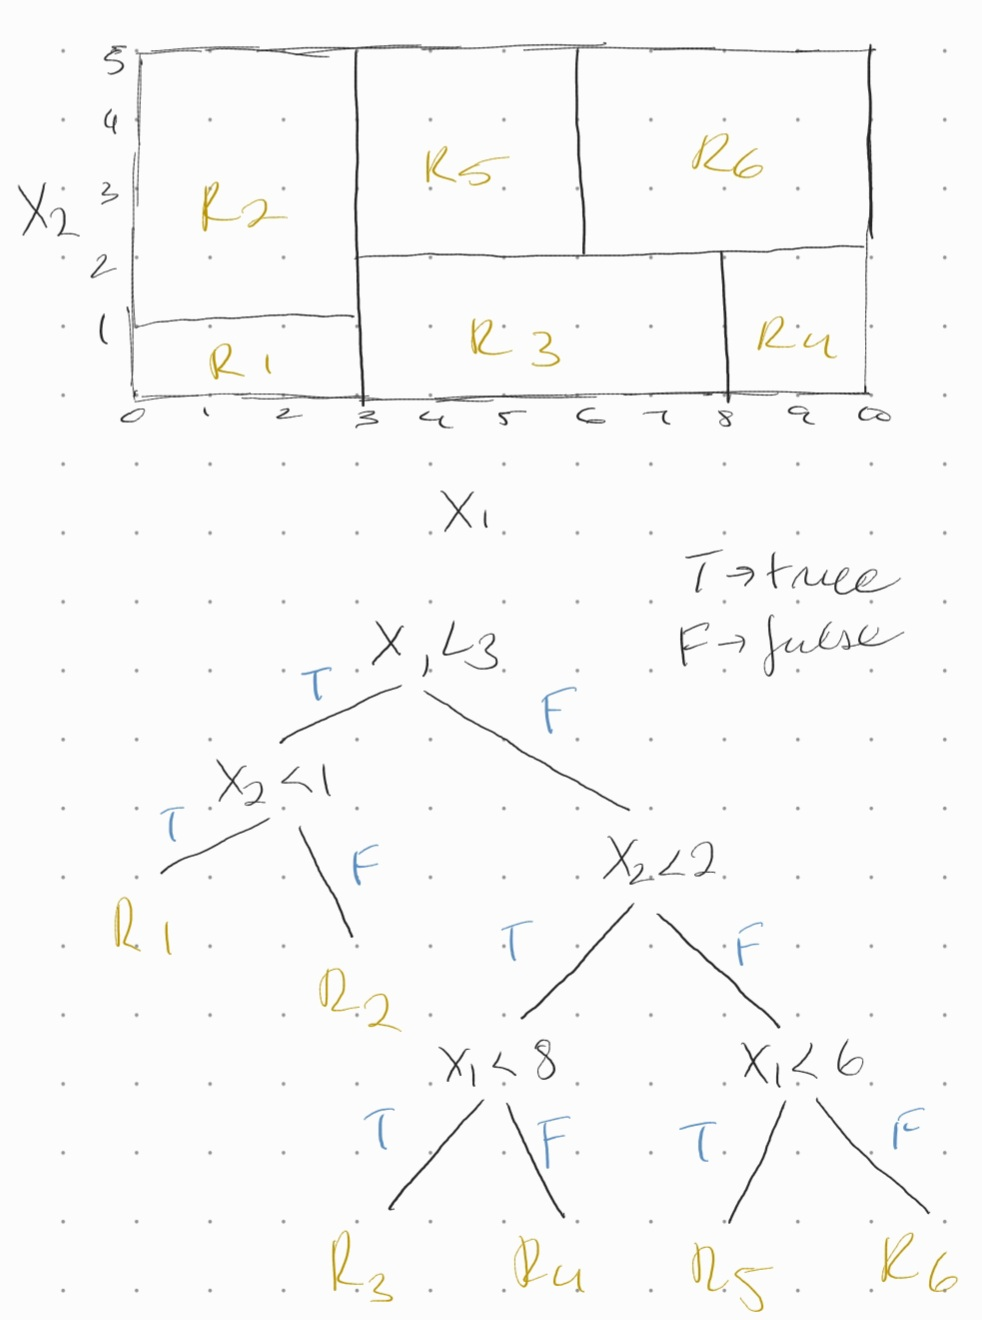

# 2.2
Majority vote approach set $P(Red|X)<.5$, else Green.
Here, red received the majority of the votes (6-4) so the final classification is red.

to classify based on the average probability, taking the average $\rightarrow.45$. This means the final classification is green.

In [22]:
import numpy as np
# pygam does not work on this computer as the python version is apparently not compatible.
#Theoretically this code should work, but I have no way of testing it at the moment...
from pygam import LogisticGAM
import matplotlib.pyplot as plt

AttributeError: module 'numpy' has no attribute 'round'

In [23]:
np.random.seed(921)
p = 10
n = 100

test_errors = np.zeros(n)
for i in range(n):
    X_train = np.zeros((n, p))
    X_test = np.zeros((n, p))
    y_train = np.zeros(n)
    y_test = np.zeros(n)
    for i in range(n):
        y_train[i] = np.random.binomial(1, 0.5)
        y_test[i] = np.random.binomial(1, 0.5)
        for j in range(p):
            if j % 2 == 0:
                if y_train[i] == 1:
                    X_train[i,j] = np.random.standard_t(df=1) + 2
                else:
                    X_train[i,j] = np.random.standard_t(df=1)
                
                if y_test[i] == 1:
                    X_test[i,j] = np.random.standard_t(df=1) + 2
                else:
                    X_test[i,j] = np.random.standard_t(df=1)
            
            else:
                if y_train[i] == 1:
                    X_train[i,j] = np.random.exponential(scale=1)
                else:
                    X_train[i,j] = np.random.exponential(scale=3)
                if y_test[i] == 1:
                    X_test[i,j] = np.random.exponential(scale=1)
                else:
                    X_test[i,j] = np.random.exponential(scale=3)
    
    gam = LogisticGAM().fit(X_train, y_train)
    y_pred = gam.predict(X_test)
    test_errors[i] = sum(y_pred != y_test)

print("Mean test error:", np.mean(test_errors))
print("Variance of test error:", np.var(test_errors))


plt.boxplot(test_errors)
plt.xlabel("p=10")
plt.ylabel("Test error")
plt.show()

# replaces p with p = 30 rather than p = 10, and run again
# this should result in a similar plot with a much longer time taken to make it....

NameError: name 'LogisticGAM' is not defined